In [42]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
#  Data cleansing 

wild_fire_1991_2015 = pd.read_csv("../wild_fire_source_data/wild_fire_1991_2015.csv")
wild_fire_2010_2019 = pd.read_csv("../wild_fire_source_data/wild_fire_2010_2019.csv")
wild_fire_2020 = pd.read_csv("../wild_fire_source_data/wild_fire_2020.csv")

wild_fire_count_1990_2020 = pd.read_csv("../wild_fire_source_data/wild_fire_count_1990_2020.csv")

In [55]:
# selecting only the necessary columns from 1991-2020 dataset
wild_fire_1991_2015_df = wild_fire_1991_2015[["Temperature(F)","latitude","longitude","disc_clean_date"]]

# selecting only the necessary columns from 2010-2019 dataset
wild_fire_2010_2019_df = wild_fire_2010_2019[["brightness(F)","latitude","longitude","acq_date"]]

# selecting only the necessary columns from 2020 dataset
wild_fire_2020_df = wild_fire_2020[["brightness(F)","latitude","longitude","acq_date"]]

# Using .rename(columns={}) in order to rename columns
renamed_1991_2015_df = wild_fire_1991_2015_df.rename(columns={"disc_clean_date" : "date"})
renamed_2010_2019_df = wild_fire_2010_2019_df.rename(columns={"brightness(F)" : "Temperature(F)","acq_date" : "date"}) 
renamed_2020_df = wild_fire_2020_df.rename(columns={"brightness(F)" : "Temperature(F)","acq_date" : "date"}) 

# count of dataframe
renamed_1991_2015_df.count()
renamed_2010_2019_df.count()
renamed_2020_df.count()

# removing duplicates
unique_1991_2015_df = renamed_1991_2015_df.drop_duplicates(subset=["date"], keep ="last")
unique_2010_2019_df = renamed_2010_2019_df.drop_duplicates(subset=["date"], keep ="last")
unique_2020_df = renamed_2020_df.drop_duplicates(subset=["date"], keep ="last")

# count after removing duplicates
unique_1991_2015_df_count = unique_1991_2015_df.count()
unique_2010_2019_df_count = unique_2010_2019_df.count()
unique_2020_df_count = unique_2020_df.count() 

# append all 3 datasets and reset the index 
combined_wild_fire1 = unique_2010_2019_df.append(unique_2020_df)
combined_wild_fire2 = unique_1991_2015_df.append(combined_wild_fire1)

# drop duplicates
combined_wild_fire2.drop_duplicates(subset=["date"],keep = "last")

# reset index
combined_wild_fire2.reset_index()

,index,Temperature(F),latitude,longitude,date
0,0,32.000000,39.540000,-101.670000,12/31/2015
1,1,37.095337,32.406052,-95.878887,12/24/2015
2,2,51.583333,35.293600,-96.547800,12/22/2015
3,3,30.200000,33.918398,-97.657024,12/21/2015
4,5,32.000000,35.193840,-94.197170,12/19/2015
...,...,...,...,...,...
11303,64481,130.730000,37.513000,-119.363000,9/23/2020
11304,64899,104.090000,39.859000,-121.281000,9/24/2020
11305,65412,135.950000,46.464000,-120.359000,9/25/2020
11306,66040,109.670000,21.306000,-158.092000,9/26/2020


<BarContainer object of 31 artists>

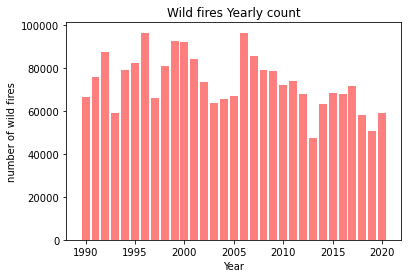

In [64]:
# Generating bar chart using matplotlib
x_axis = wild_fire_count_1990_2020['Year'] 
y_axis = wild_fire_count_1990_2020['Fires'].str.replace(',', '').astype(int)

# Set a Title and labels
plt.title("Wild fires Yearly count")
plt.xlabel("Year")
plt.ylabel("number of wild fires")

# Create a list indicating where to write x labels and set figure size to adjust for space
# plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis , color='r', alpha=0.5, align="center")